# Problem Statement

An Education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Process Overview

The process includes following steps

1. Reading and Understand the data
2. Data Cleansing
3. Exploratory Data Analysis (EDA)
4. Data Preperation
5. Model Building
6. Model Evaluation
7. Prediction on Test set and calculating the lead scores
8. Conclusions

# Importing required libraries

In [2]:
#for data cleansing
import pandas as pd
import numpy as np

#for visualisations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve


#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Step1: Reading and Understanding the Data

### Reading the data

In [3]:
#importing the Leads data file in to the pandas dataframe df
df = pd.read_csv("Leads.csv")

### Inspecting the dataset

In [4]:
#checking the top 5 rows of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking the shape of the dataset
df.shape

(9240, 37)

In [7]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking the summary statistics of numerical features
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleansing

In [9]:
#checking the number of unique vaues in each feature
df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

In [11]:
#dropping unwanted features
df = df.drop(["Prospect ID", "Lead Number", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", 
               "Magazine", "I agree to pay the amount through cheque" ], axis=1  )

In [12]:
df.shape

(9240, 30)

### Analysis on the Null Values

In [13]:
# Replacing the "Select" values with NaN since there was no value selected and is equivalent to the null.
df = df.replace('Select', np.nan)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [14]:
#null values in percentages
(df.isnull().sum().sort_values(ascending=False) / len(df) ) * 100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [15]:
#removing features that have more than 40% of null values
df1 = df[df.columns[df.isnull().sum() / len(df) < 0.40 ] ]
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [16]:
#null values in percentages
(df1.isnull().sum().sort_values(ascending=False) / len(df1) ) * 100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

### Imputing null values

In [17]:
# Imputing the "City" feature, filling null values with a new category "UnKnown"
df1["City"] = df1["City"].fillna('UnKnown')
df1["City"].value_counts()

UnKnown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# Imputing the "Specialization" feature, filling null values with a new category "UnKnown"
df1["Specialization"] = df1["Specialization"].fillna('UnKnown')
df1["Specialization"].value_counts()

UnKnown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# Imputing the "Tags" feature, filling null values with a new category "UnKnown"
df1["Tags"] = df1["Tags"].fillna('UnKnown')
df1["Tags"].value_counts()

UnKnown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [21]:
#creating a list of values that have less count
Other_list = ['opp hangup', 'number not provided' , 'in touch with EINS' ,'Lost to Others' , 'Still Thinking' , 'Want to take admission but has financial problems'  ,
 'In confusion whether part time or DLP', 'Interested in Next batch'  ,  'Lateral student'  , 'University not recognized' , 
 'Shall take in the next coming month' , 'Recognition issue (DEC approval)'  ]

In [22]:
#replacing values that have less counts with new category "Others"
df1["Tags"] = df1["Tags"].replace(Other_list,'Others')
df1["Tags"].value_counts()

UnKnown                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Others                                  109
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Name: Tags, dtype: int64

In [23]:
# Imputing the "What matters most to you in choosing a course" feature, filling null values with a new category "UnKnown"
df1["What matters most to you in choosing a course"] = df1["What matters most to you in choosing a course"].fillna('UnKnown')
df1["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
UnKnown                      2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Imputing the "What is your current occupation" feature, filling null values with a new category "UnKnown"
df1["What is your current occupation"] = df1["What is your current occupation"].fillna('UnKnown')
df1["What is your current occupation"].value_counts()

Unemployed              5600
UnKnown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# Imputing the "Country" feature, filling null values with a new category "UnKnown"
df1["Country"] = df1["Country"].fillna('UnKnown')

#Since there are very less numbers from countries outside India, creating one catogory "Outside India" for all other countries
def country_map(x):
    if x== "India":
        return "India"
    elif x== "UnKnown":
        return "UnKnown"
    else:
        return "Outside India"
        

df1['Country'] = df1['Country'].apply(country_map)
df1["Country"].value_counts()

India            6492
UnKnown          2461
Outside India     287
Name: Country, dtype: int64

In [26]:
# Imputing the "TotalVisits" feature, filling null values with median
df1["TotalVisits"] = df1["TotalVisits"].fillna(df1["TotalVisits"].median())

In [27]:
# Imputing the "Page Views Per Visit" feature, filling null values with median
df1["Page Views Per Visit"] = df1["Page Views Per Visit"].fillna(df1["Page Views Per Visit"].median())

In [29]:
# Removing rows that have null values
df1 = df1.dropna(axis = 0, how ='any')
df1.shape

(9103, 23)

In [30]:
#null values in percentages
( df1.isnull().sum().sort_values(ascending=False) / len(df1) ) * 100

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

# Step3: EDA

## Uni-Variate Analysis

In [31]:
num_cols = df1.describe().columns
cat_cols = df1.describe(include='object').columns

### Categorical Columns

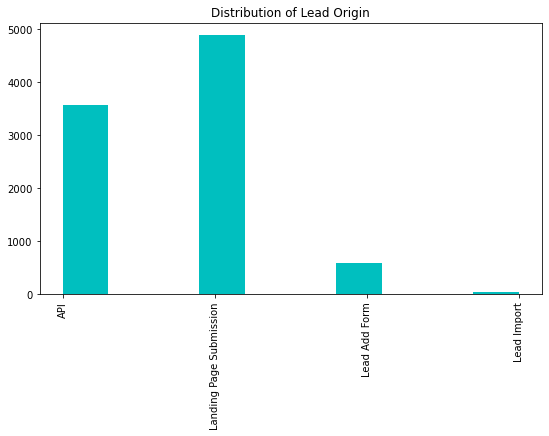

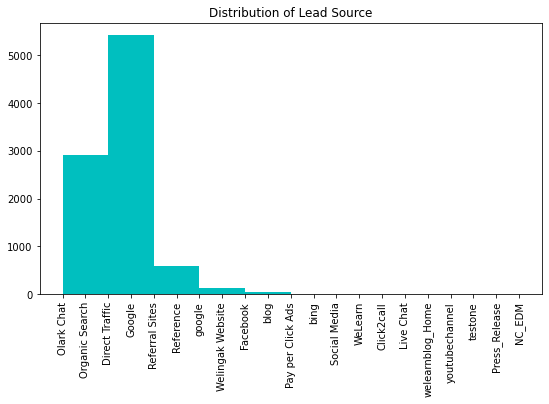

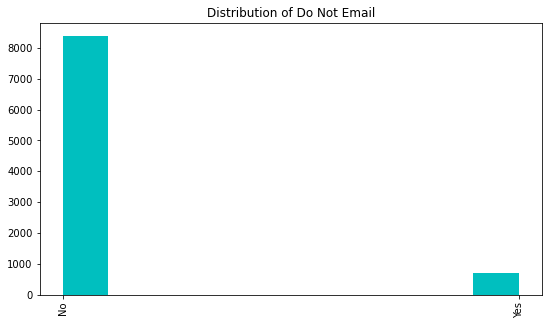

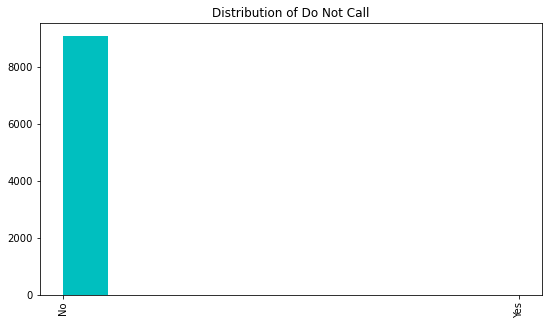

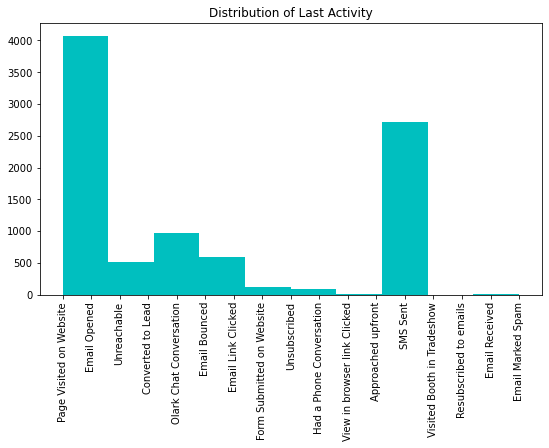

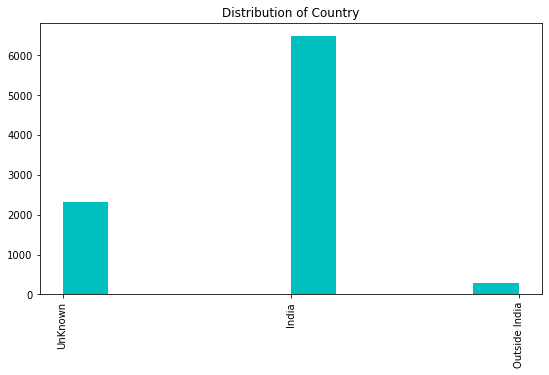

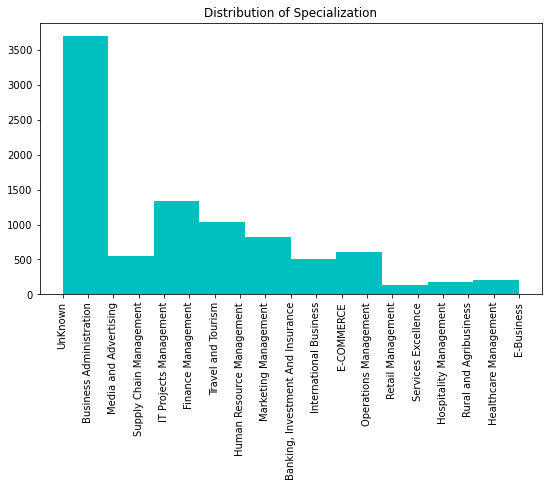

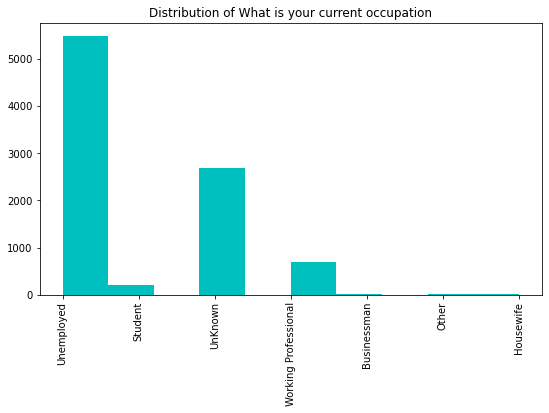

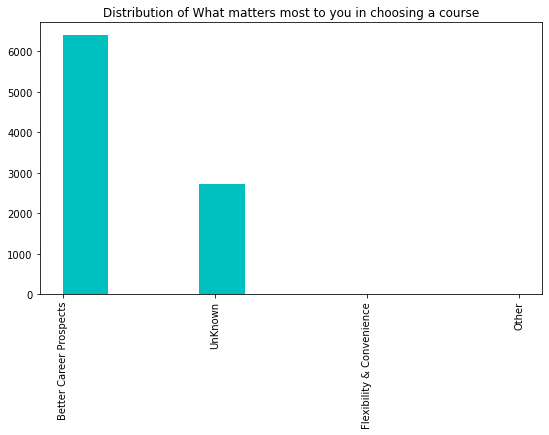

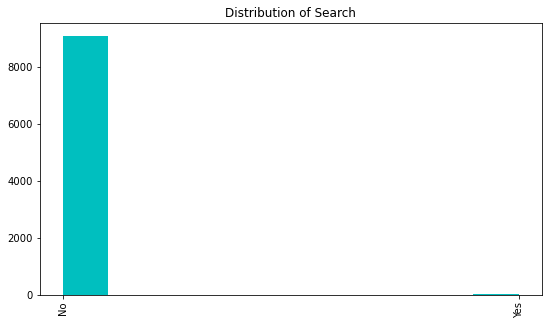

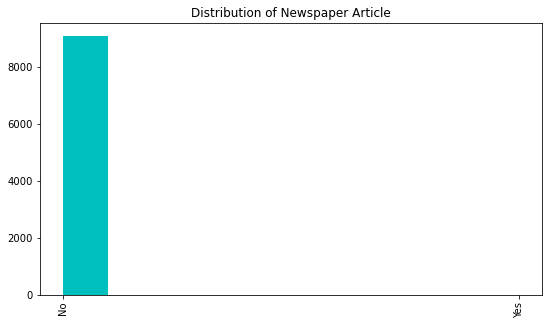

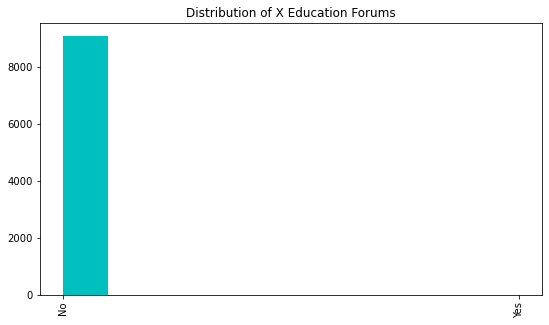

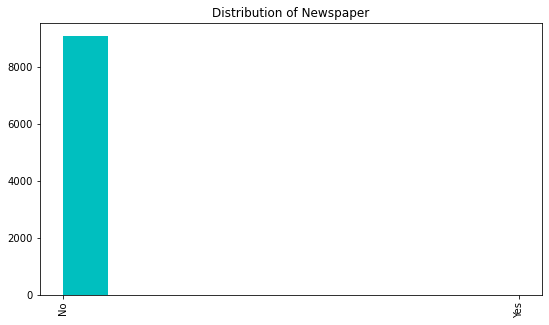

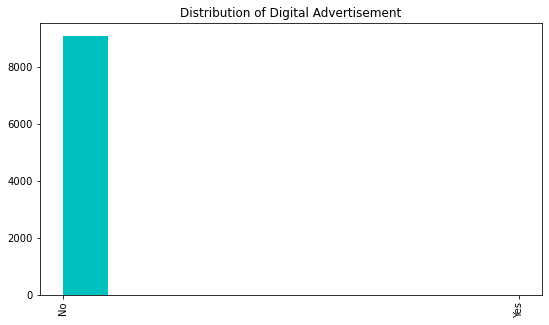

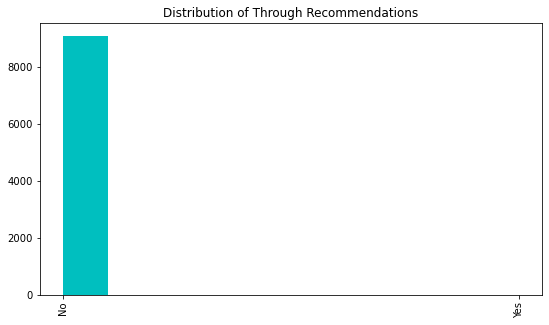

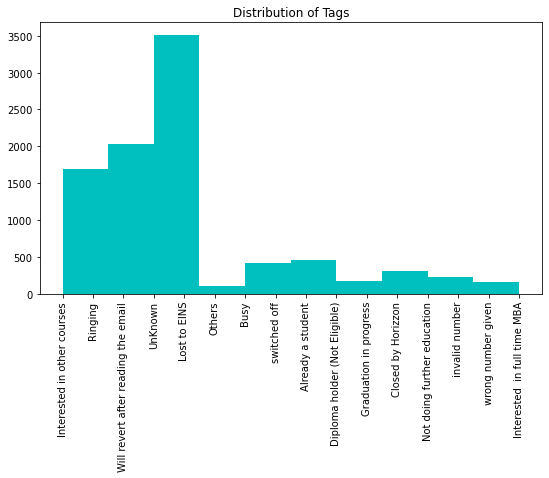

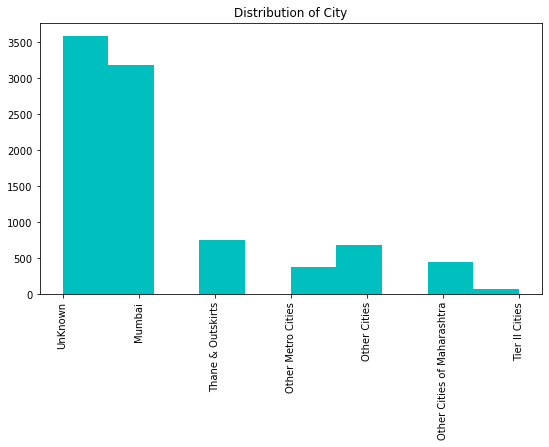

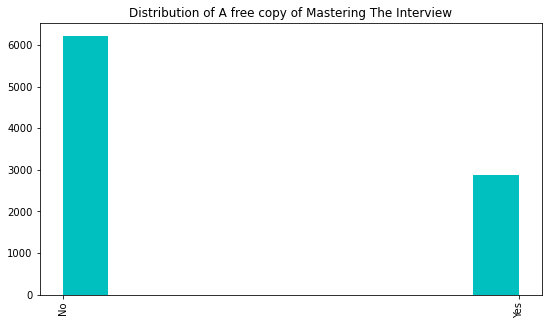

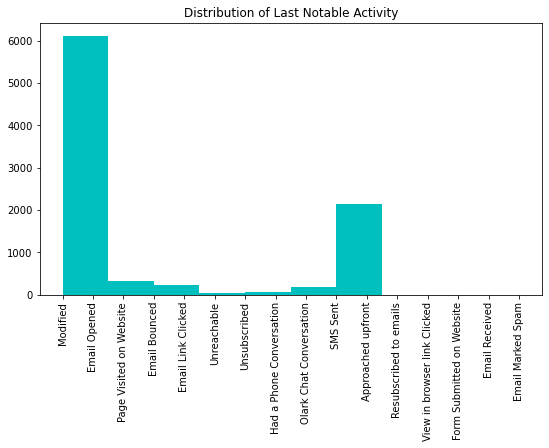

In [33]:
for col in cat_cols:
    plt.figure(figsize=(9,5))
    plt.title("Distribution of " + col)
    plt.hist(df1[col],color='c' )
    plt.xticks(rotation=90)
    plt.show()

### Inferences

* Majority of the leads are coming from India, and very few are from outside India
* Google is being the major sourse of the leads
* People from IT and Finance specializations are more interested in taking courses, however people are unlike to provide their specialization while filling the form.
* Majority of the leads are coming in are from "Unemployed" as occupation, followed by working professionals
* Almost all the leads coming in are looking for "Better Career Prospects"
* Mumbai city is the major contributor of the leads

### Numerical Columns

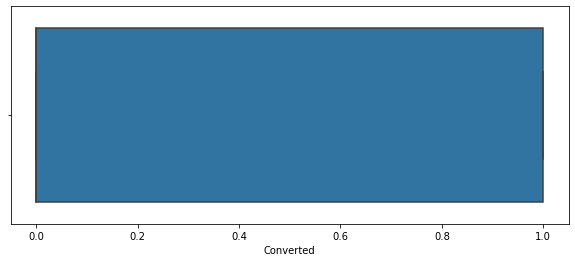

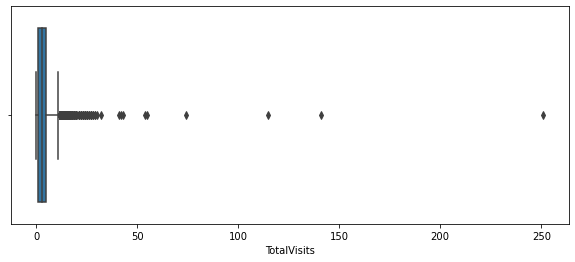

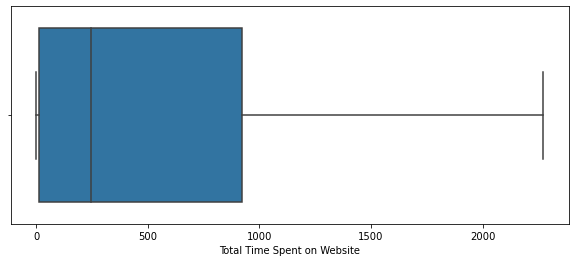

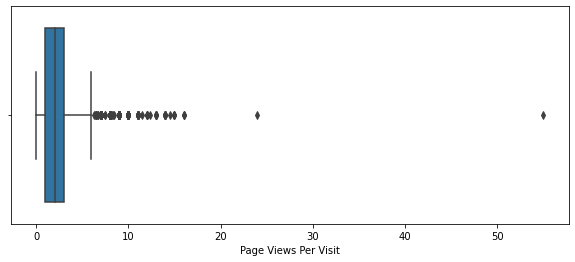

In [34]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(df1[col])
    plt.show()

* There are outliers present in "TotalVisits" and "Page Views Per Visit" that needs to fixed.

### Fixing Outliers

In [35]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Converted,9103.0,0.379216,0.485219,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
TotalVisits,9103.0,3.454575,4.851123,0.0,1.0,3.0,5.0,7.0,10.0,17.0,251.0
Total Time Spent on Website,9103.0,483.773921,545.519186,0.0,12.0,247.0,924.0,1375.0,1557.0,1839.0,2272.0
Page Views Per Visit,9103.0,2.368972,2.157526,0.0,1.0,2.0,3.0,5.0,6.0,9.0,55.0


#### Removing outlier values based on the Interquartile distance for some of the continuous variable

In [37]:
Q1 = df1['TotalVisits'].quantile(0.25)
Q3 = df1['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df1=df1.loc[(df1['TotalVisits'] >= Q1 - 1.5*IQR) & (df1['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = df1['Page Views Per Visit'].quantile(0.25)
Q3 = df1['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df1=df1.loc[(df1['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df1['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
df1.shape

(8389, 23)

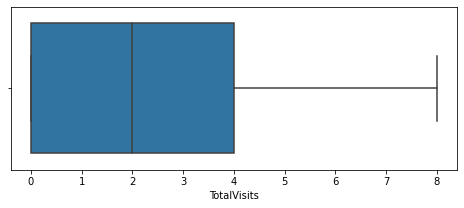

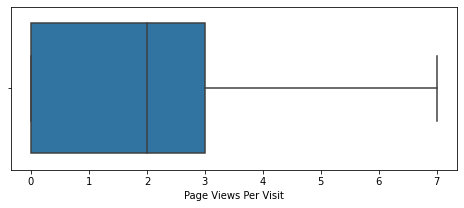

In [38]:
num_vars = ['TotalVisits','Page Views Per Visit']

#Function to plot the box plot 
for col in num_vars:
    plt.figure(figsize=(8,3))
    sns.boxplot(df1[col])
    plt.show() 

## Bi-Variate Analysis

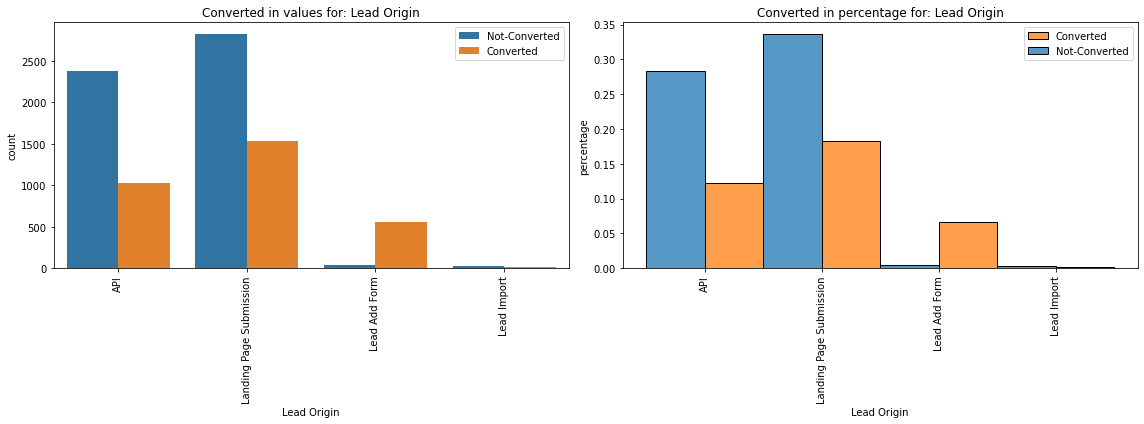

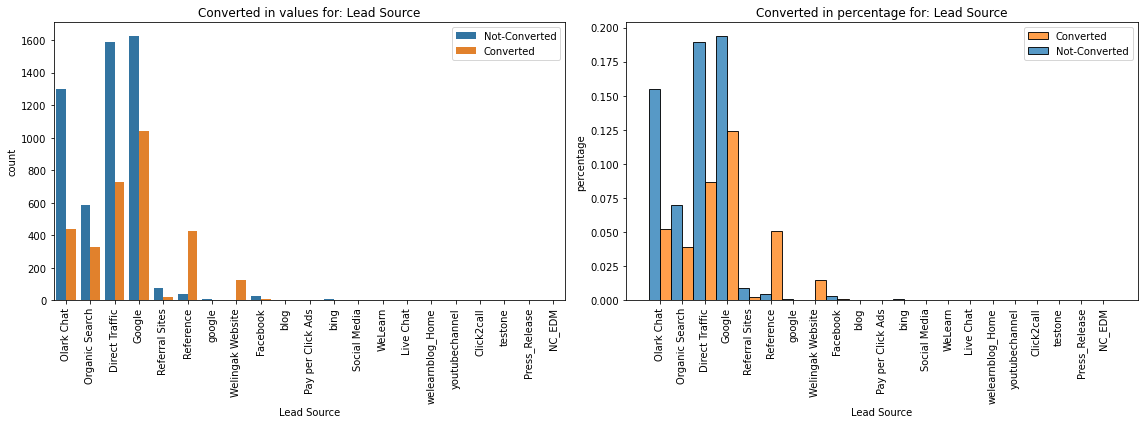

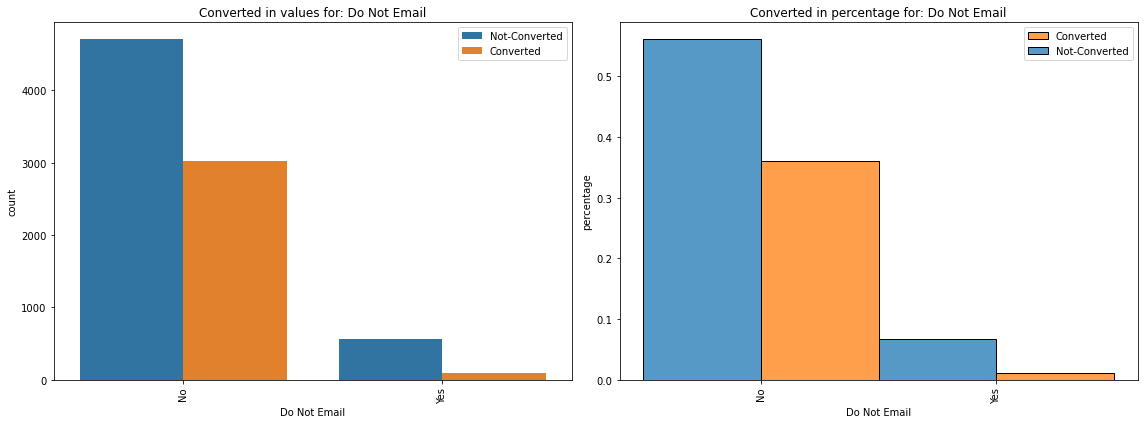

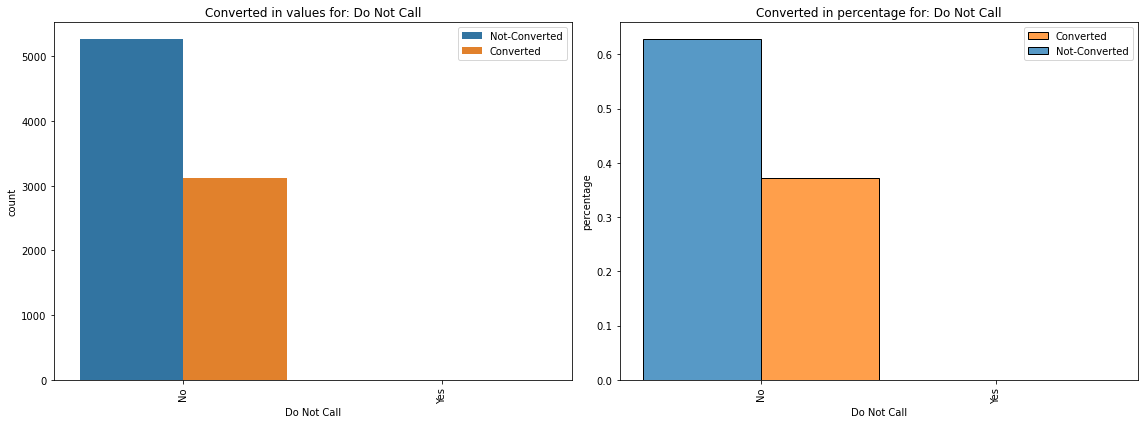

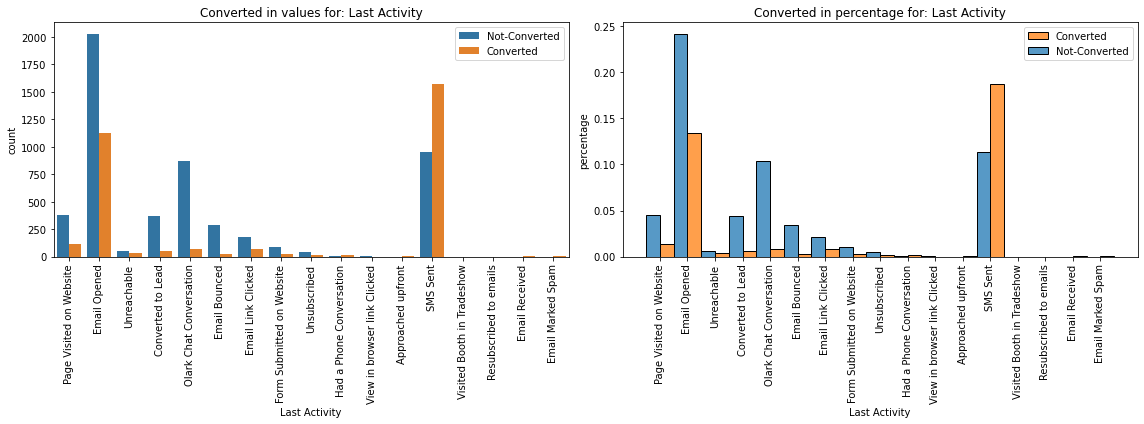

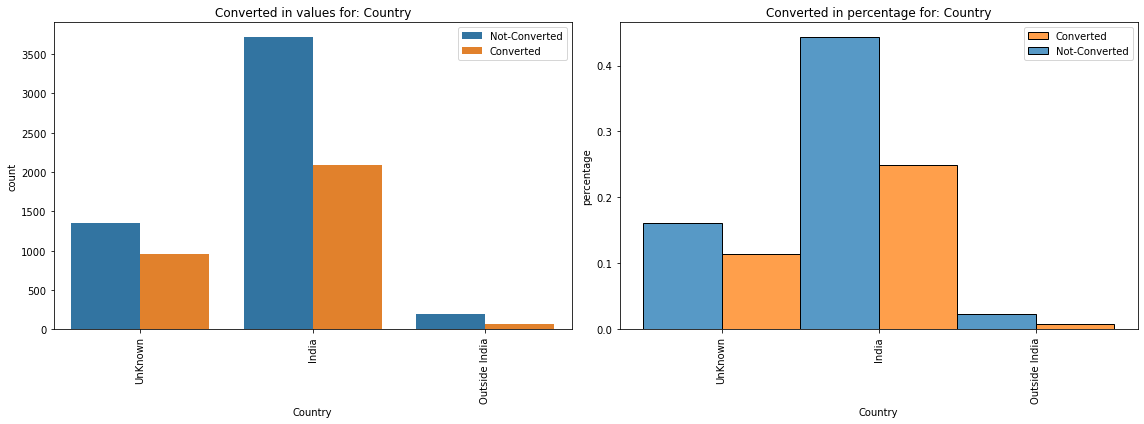

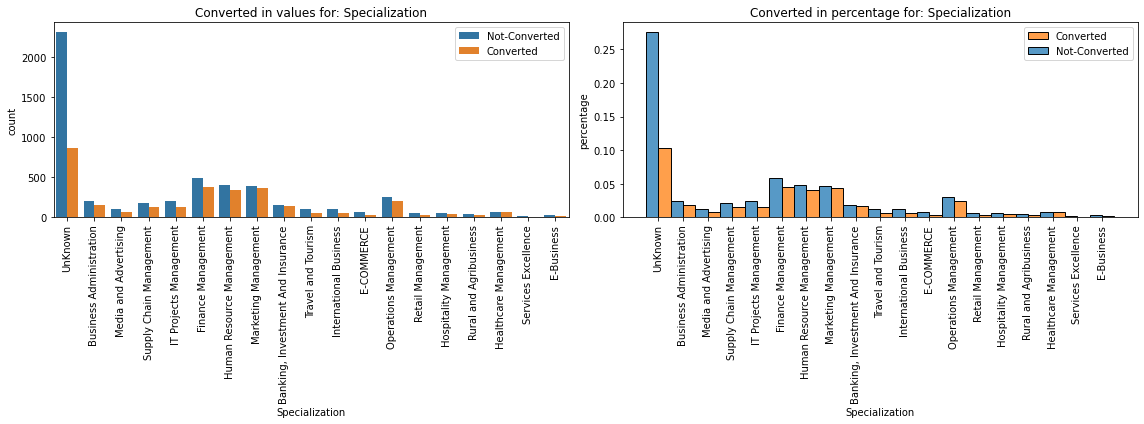

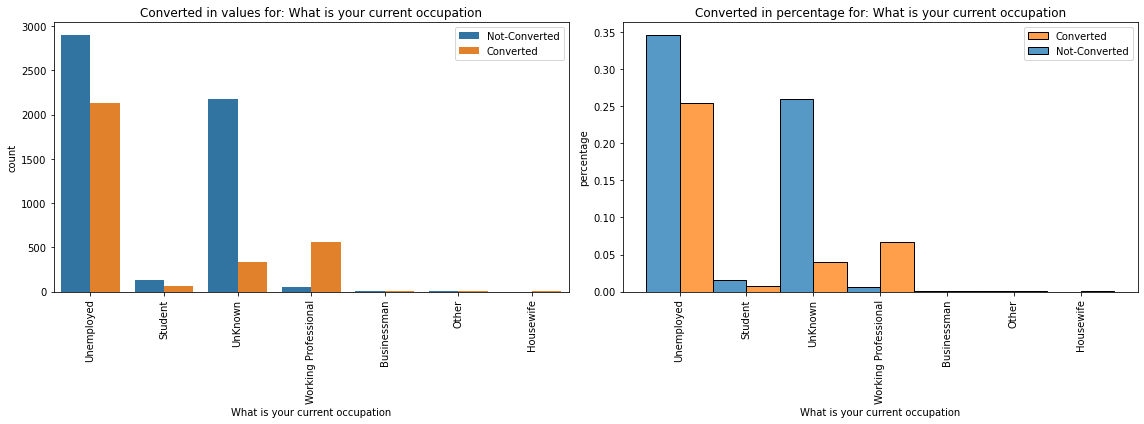

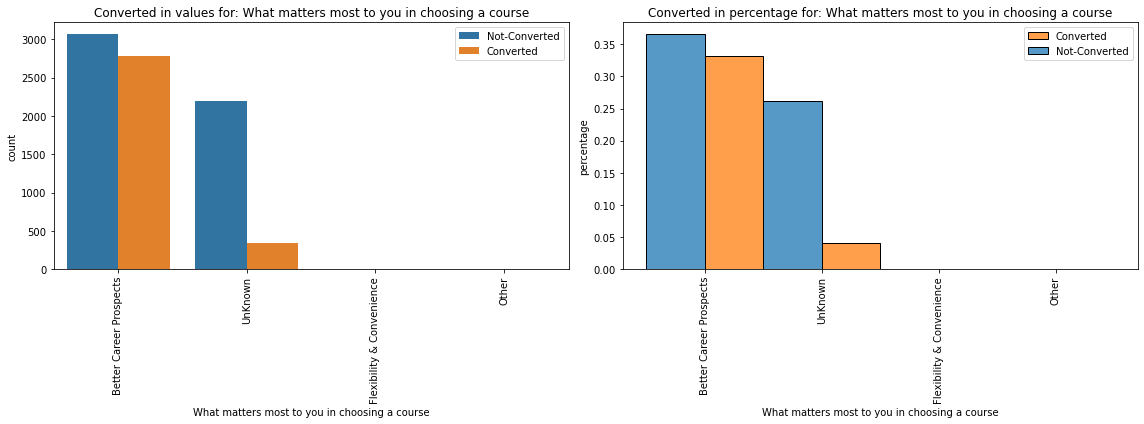

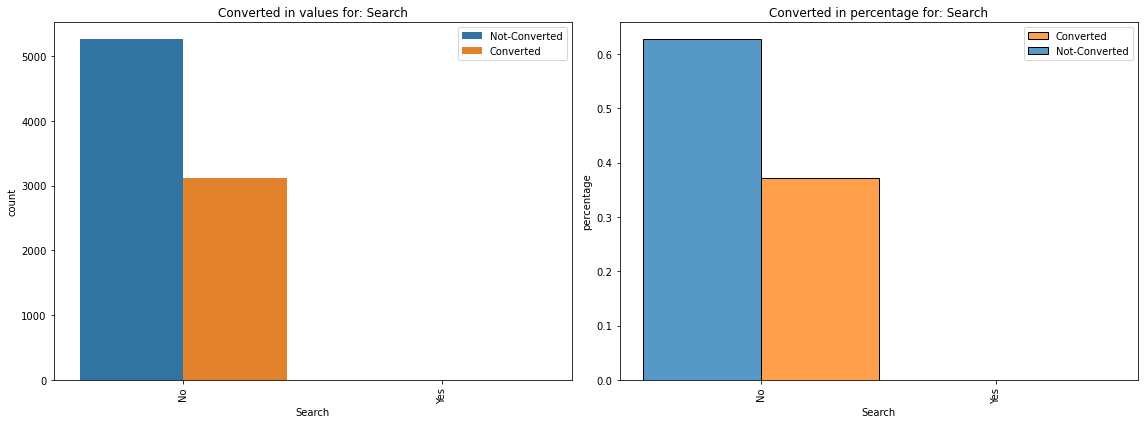

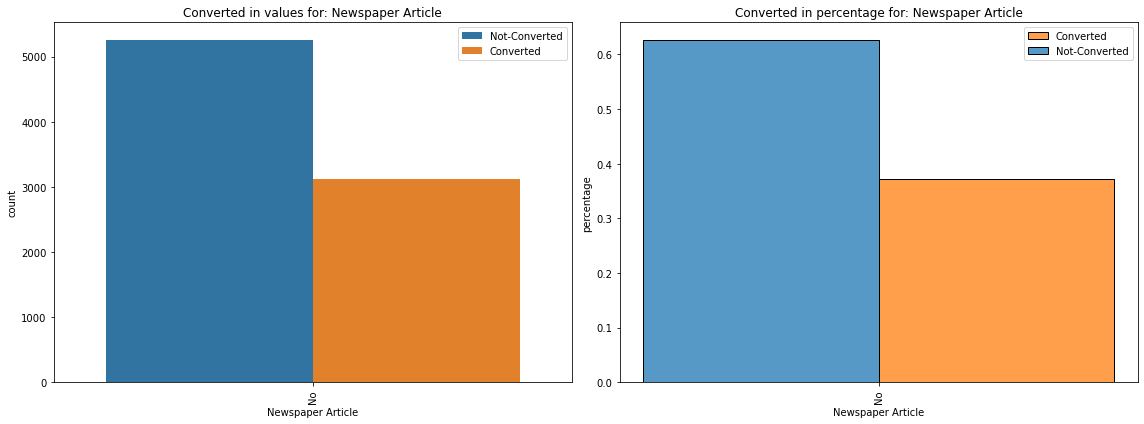

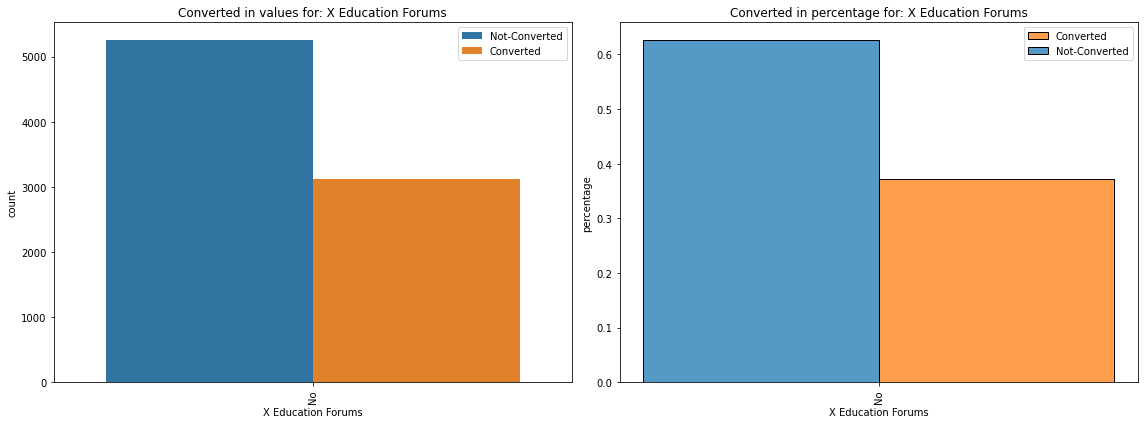

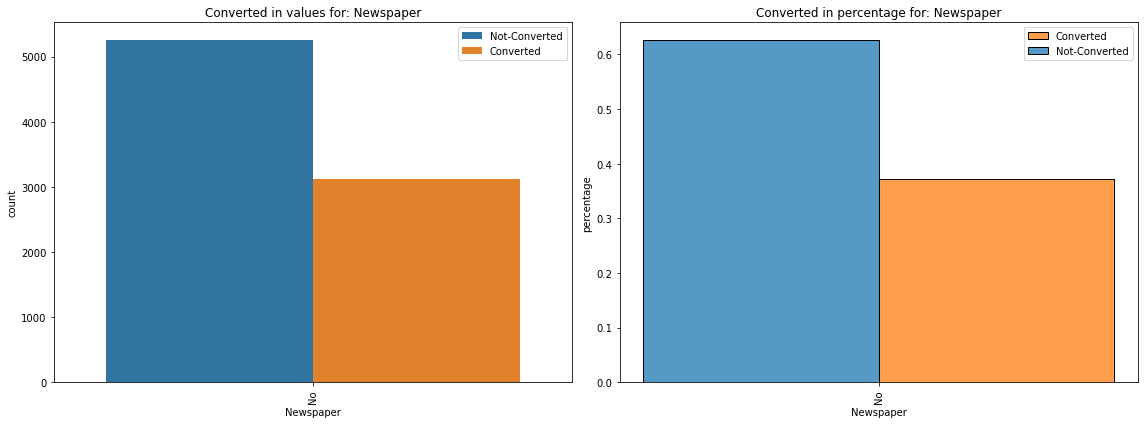

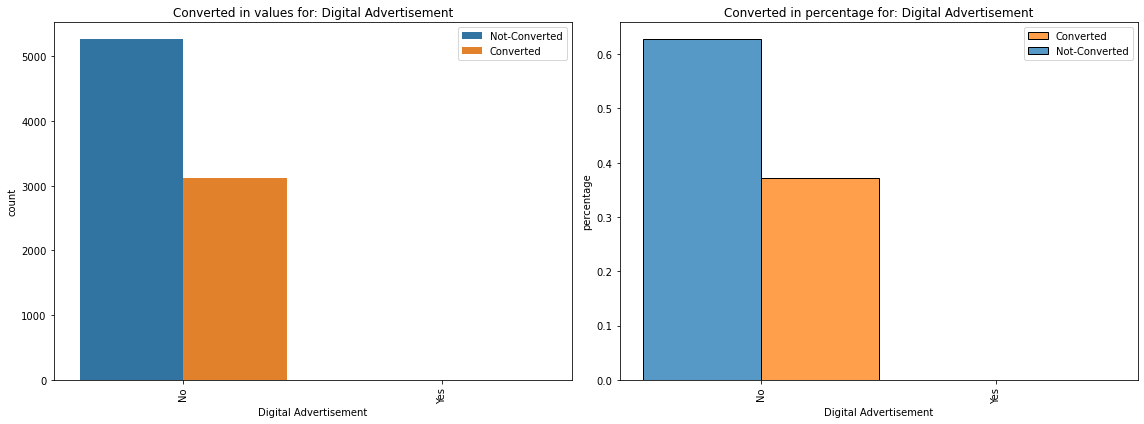

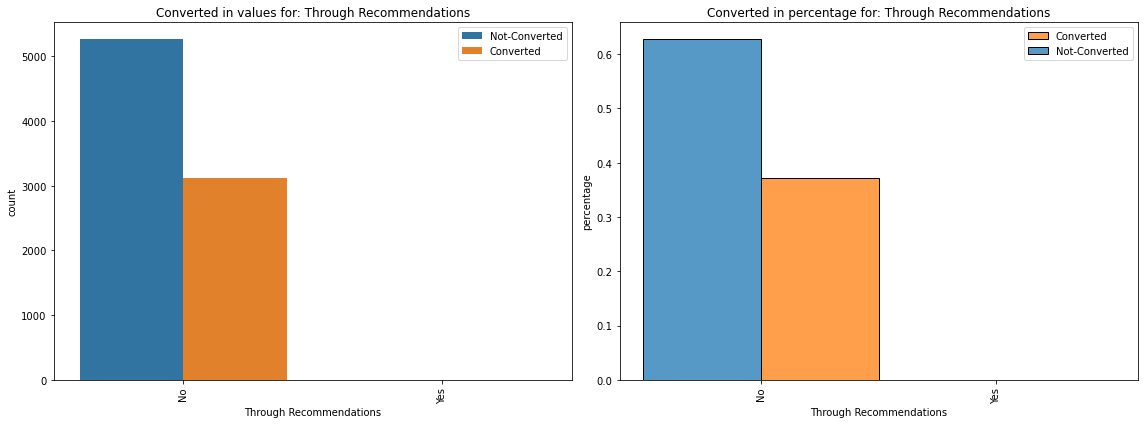

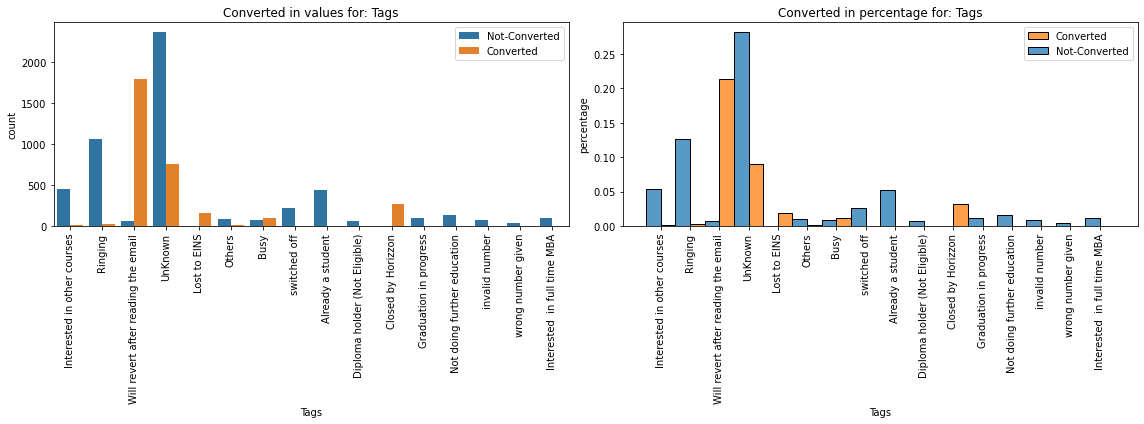

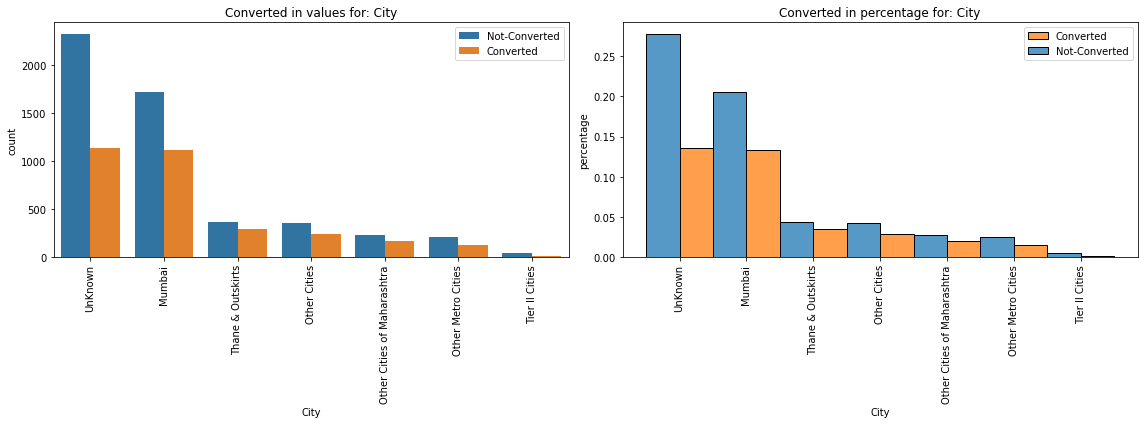

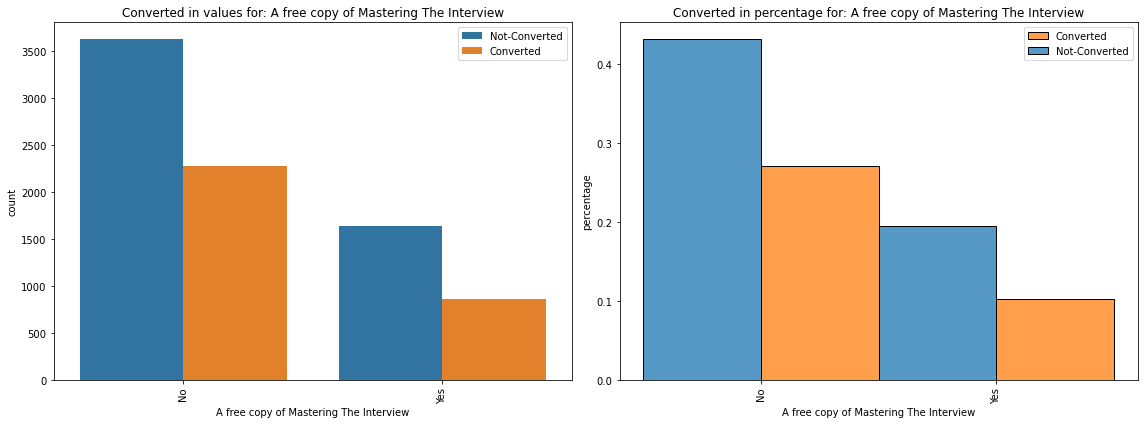

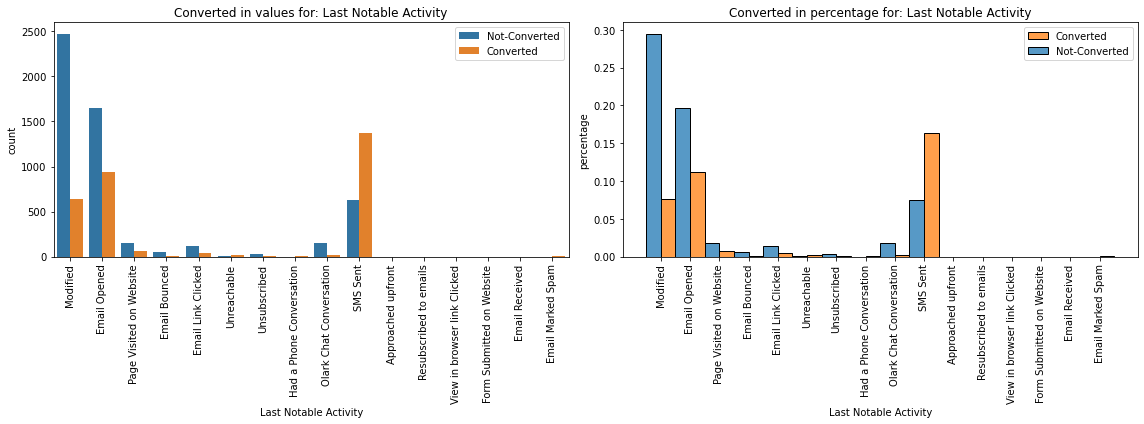

In [39]:
#creating graphs to compare the categorical features with target feature "Converted"

for col in cat_cols:

    fig = plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    sns.countplot(x= col, data=df1, hue='Converted' )
    plt.title('Converted in values for: ' + col)
    plt.xticks(rotation=90)
    plt.legend(["Not-Converted", "Converted"], loc ="upper right")
    
    plt.subplot(1,2,2)
    sns.histplot(df1, x=col, hue="Converted", stat="probability", multiple="dodge")
    plt.title('Converted in percentage for: ' + col)
    plt.xticks(rotation=90)
    plt.legend([ "Converted", "Not-Converted"], loc ="upper right")
    plt.ylabel('percentage')

    fig.tight_layout()
    plt.show()

### Inferences

* The conversion rate seems quite high from the Lead Origin "Lead Add Form"
* The leads which coming through Referrals seems have very high conversion rate and followed by Welingkak website
* The conversion rate is high for working professionals
* The conversion rate seems high for leads with Tag as "Will revert after reading the email" followed by "Closes by Horrizon"
* The conversion rate seems high for the leads with Last Notable Activity as "SMS Sent"

### Correlation Analysis

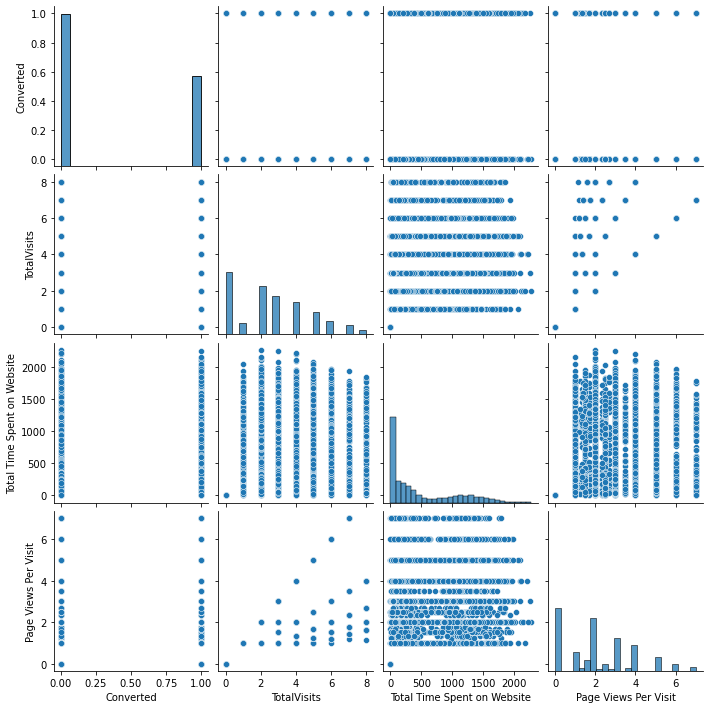

In [40]:
# plotting the pairplot for visualising numerical columns
sns.pairplot(df1)
plt.show()

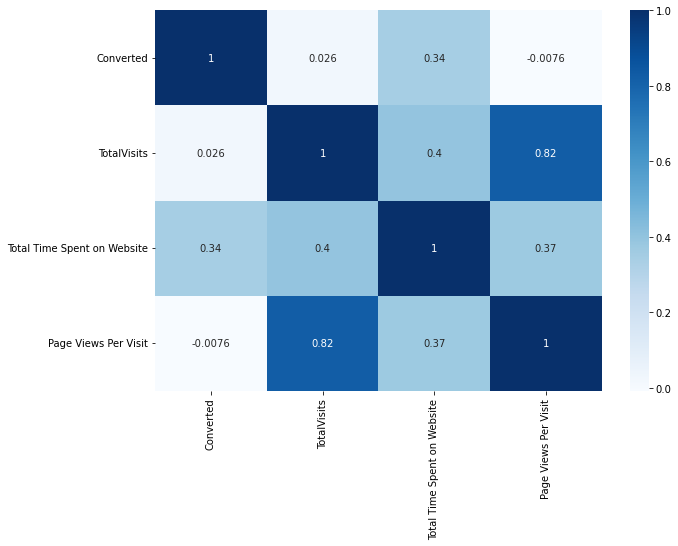

In [41]:
#plotting heatmap to see the correlations between features
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')
plt.show()

* The features "Page Views Per Visit" and "TotalVisits" have the highest correlation between them.

# Step 4: Data Preperation

In [42]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,UnKnown,...,No,No,No,No,No,No,Interested in other courses,UnKnown,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,UnKnown,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [43]:
#checking for number of unique values in each feature
df1.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1663
Page Views Per Visit                               22
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Tags                                               16
TotalVisits                                         9
City                                                7
What is your current occupation                     7
What matters most to you in choosing a course       4
Lead Origin                                         4
Country                                             3
Converted                                           2
Search                                              2
Digital Advertisement                               2
Through Recommendations                             2
Do Not Call                                         2
Do Not Email                

In [47]:
#dropping sales team features since these can't be used in the model
sales_col = [ 'Last Activity', 'Tags', 'Last Activity', 'Last Notable Activity']
df1 = df1.drop(sales_col, axis = 1)

KeyError: "['Last Activity', 'Tags', 'Last Activity', 'Last Notable Activity'] not found in axis"

### Categorical Columns

In [48]:
#List of features with "Yes" and "No"
binary_cols = ["Search", "Newspaper Article", "Newspaper",  "Digital Advertisement", "Through Recommendations",  
               "Do Not Call", "Do Not Email", "A free copy of Mastering The Interview", "X Education Forums" ]

#Replcing "Yes" and "No" with 1 and 0 respectively
def bin_map(x):
    return x.map({'Yes':1, 'No':0})

df1[binary_cols] = df1[binary_cols].apply(bin_map)

In [49]:
#checking the values in each categorical feature
cat_cols = df1.describe(include='object').columns

for col in cat_cols:
    print("*************************"+ col + "***************************")
    print(df1[col].value_counts())

*************************Lead Origin***************************
Landing Page Submission    4349
API                        3407
Lead Add Form               596
Lead Import                  37
Name: Lead Origin, dtype: int64
*************************Lead Source***************************
Google               2672
Direct Traffic       2313
Olark Chat           1738
Organic Search        915
Reference             460
Welingak Website      128
Referral Sites         99
Facebook               38
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
*************************Country***************************
India            5812
UnKnown          2314
Outside India     263
Name: Co

#### Modifying the Lead Source column

In [50]:
#replcaing values with "Others" that have less count
source = ['bing', 'Click2call', 'Live Chat', 'Social Media', 'Pay per Click Ads' , 'welearnblog_Home', 'WeLearn', 
          'youtubechannel', 'Press_Release' ,  'blog' ,  'NC_EDM', 'testone']

df1["Lead Source"] = df1["Lead Source"].replace('google','Google')
df1["Lead Source"] = df1["Lead Source"].replace(source,'Others')
df1["Lead Source"].value_counts()

Google              2677
Direct Traffic      2313
Olark Chat          1738
Organic Search       915
Reference            460
Welingak Website     128
Referral Sites        99
Facebook              38
Others                21
Name: Lead Source, dtype: int64

### Dummy variables

In [51]:
#Creating dummy variables for cat_cols
df1_dummies = pd.get_dummies(df1[cat_cols], drop_first=True )
df1_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Adding the dummies to the original leads_sample dataframe
df1_comb = pd.concat([df1, df1_dummies], axis = 1)
df1_comb.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
0,API,Olark Chat,0,0,0,0.0,0,0.0,UnKnown,UnKnown,...,0,0,0,0,0,0,0,0,0,1
1,API,Organic Search,0,0,0,5.0,674,2.5,India,UnKnown,...,0,0,0,0,0,0,0,0,0,1
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,UnKnown,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Drop the categorical features as we have created the dummies
df1_comb.drop(cat_cols, axis = 1, inplace = True)
df1_comb.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#checking the info of new dataframe
df1_comb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8389 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             8389 non-null   int64  
 1   Do Not Call                                                              8389 non-null   int64  
 2   Converted                                                                8389 non-null   int64  
 3   TotalVisits                                                              8389 non-null   float64
 4   Total Time Spent on Website                                              8389 non-null   int64  
 5   Page Views Per Visit                                                     8389 non-null   float64
 6   Search                                                                  

### Creating train and test datasets

In [55]:
# Creating "X" with all independent features and "y" with dependent feature
y = df1_comb.pop('Converted')
X = df1_comb

In [56]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
# checking the shape of the train and test data sets
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (5872, 58)
X_test:  (2517, 58)
y_train:  (5872,)
y_test:  (2517,)


### Rescaling the features

In [60]:
scaler = StandardScaler()

#creating list of numerical variables for rescaling
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Applying the scaling to the numerical variables 
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
3812,0,0,-0.311863,0.693924,-0.071433,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,0,0,1.087468,1.878909,1.653626,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
784,0,0,0.154581,0.938649,0.503587,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2996,0,0,0.154581,-0.301537,0.503587,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0.621024,1.636024,1.078606,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Conversion Rate

In [62]:
### Calculating the Conversion Rate
Conversion_rate = (sum(df1['Converted'])/len(df1['Converted'].index))*100
Conversion_rate

37.26308260817737

__The Conversion rate stands at 37.55%__

# Step 5: Model Building

### Feature selection using RFE

In [63]:
# Running RFE with the output number of the variable equal to 20
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=  20)             
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 39),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Search', False, 28),
 ('Newspaper Article', False, 37),
 ('X Education Forums', False, 36),
 ('Newspaper', False, 35),
 ('Digital Advertisement', False, 15),
 ('Through Recommendations', False, 16),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Outside India', False, 4),
 ('Country_UnKnown', True, 1),
 ('Specialization_Business Administration', False, 21),
 ('Spec

In [65]:
#Top 20 features that are selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_Hospitality Management', 'Specialization_UnKnown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_UnKnown',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

In [66]:
#features that are not selected
col_x = X_train.columns[~rfe.support_]
col_x

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Country_Outside India',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'

### Correlation between the features that are selected by RFE

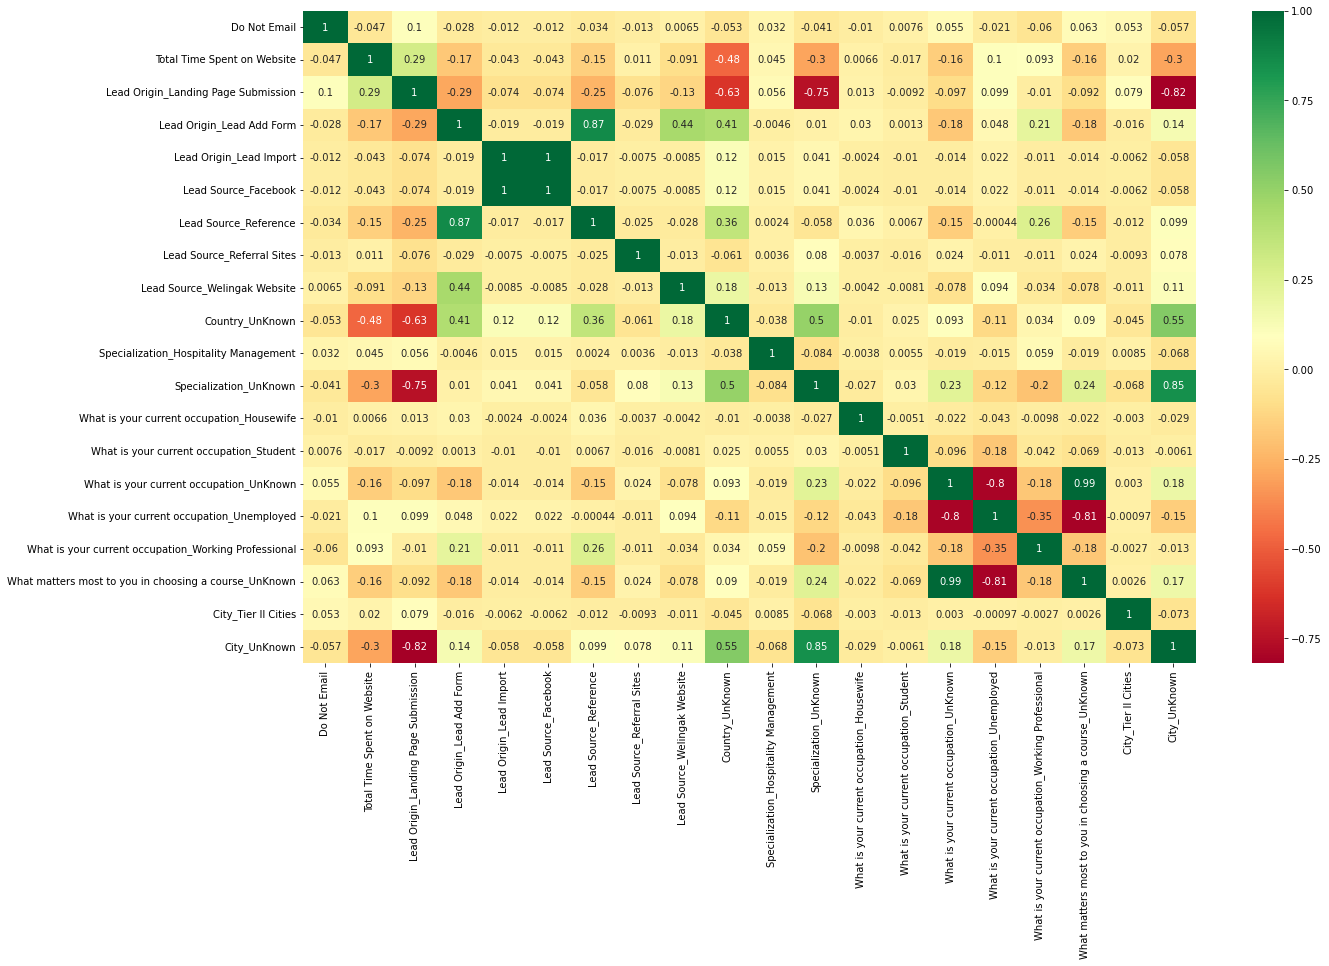

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,12)) 
sns.heatmap(X_train[col].corr(),cmap = 'RdYlGn', annot = True)
plt.show()

### Model 1

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5852
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.5
Date:                Tue, 23 May 2023   Deviance:                       5137.0
Time:                        13:45:23   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.6373      0.756      0.843      0.399      -0.845       2.120
Do Not Email                                             -1.2005      0.168     -7.154      0.000      -1.529      -0.872
Total Time Spent on Website                               1.1400      0.042     27.293      0.000       1.058       1.222
Lead Origin_Landing Page Submission                      -1.1140      0.142     -7.827      0.000      -1.393      -0.835
Lead Origin_Lead Add Form                                 0.7868      0.890      0.884      0.377      -0.957       2.531
Lead Origin_Lead Import                                  -0.6352      0.241     -2.632      0.008      -1.108      -0.162
Lead Source_Facebook                                     -0.6352      0.241     -2.632      0.008      -1.108      -0.162
Lead Source_Reference                                     1.3949      0.912      1.529      0.126      -0.393       3.182
Lead Source_Referral Sites                               -0.4284      0.367     -1.166      0.244      -1.149       0.292
Lead Source_Welingak Website                              4.4554      1.344      3.315      0.001       1.821       7.090
Country_UnKnown                                           1.2899      0.121     10.702      0.000       1.054       1.526
Specialization_Hospitality Management                    -1.0169      0.343     -2.966      0.003      -1.689      -0.345
Specialization_UnKnown                                   -0.6427      0.159     -4.051      0.000      -0.954      -0.332
What is your current occupation_Housewife                23.2652   2.58e+04      0.001      0.999   -5.05e+04    5.05e+04
What is your current occupation_Student                  -0.7098      0.786     -0.903      0.367      -2.251       0.831
What is your current occupation_UnKnown                  20.3534   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_Unemployed               -0.3709      0.753     -0.492      0.622      -1.847       1.106
What is your current occupation_Working Professional      1.8203      0.772      2.357      0.018       0.306       3.334
What matters most to you in choosing a course_UnKnown   -22.0135   1.83e+04     -0.001      0.999    -3.6e+04    3.59e+04
City_Tier II Cities                                      -0.5086      0.461     -1.104      0.270      -1.412       0.395
City_UnKnown                                             -0.6731      0.170     -3.961      0.000      -1.006      -0.340
=========================================================================================================================
"""

#### Checking VIFs

In [69]:
# Creating a function to create a dataframe that will contain the names of all the feature variables and their respective VIFs

def VIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

VIF(col)

,Features,VIF
4,Lead Origin_Lead Import,inf
5,Lead Source_Facebook,inf
17,What matters most to you in choosing a course_...,142.03
14,What is your current occupation_UnKnown,141.64
3,Lead Origin_Lead Add Form,51.07
6,Lead Source_Reference,40.03
8,Lead Source_Welingak Website,11.56
15,What is your current occupation_Unemployed,9.59
19,City_UnKnown,9.16
2,Lead Origin_Landing Page Submission,8.68


__There are a few variables with high P-Value and high VIF. It's best to drop these variables as they are not significant in the model. The variable 'Lead Origin_Lead Import' has the highest P-Value and high VIF. So let's start by dropping that.__

In [70]:
col = col.drop('Lead Origin_Lead Import', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_UnKnown', 'Specialization_Hospitality Management',
       'Specialization_UnKnown', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_UnKnown',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 2

In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5852
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.5
Date:                Tue, 23 May 2023   Deviance:                       5137.0
Time:                        13:45:41   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3593
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     0.6373      0.756      0.843      0.399      -0.845       2.120
Do Not Email                                             -1.2005      0.168     -7.154      0.000      -1.529      -0.872
Total Time Spent on Website                               1.1400      0.042     27.293      0.000       1.058       1.222
Lead Origin_Landing Page Submission                      -1.1140      0.142     -7.827      0.000      -1.393      -0.835
Lead Origin_Lead Add Form                                 0.7868      0.890      0.884      0.377      -0.957       2.531
Lead Source_Facebook                                     -1.2705      0.483     -2.632      0.008      -2.216      -0.324
Lead Source_Reference                                     1.3949      0.912      1.529      0.126      -0.393       3.182
Lead Source_Referral Sites                               -0.4284      0.367     -1.166      0.244      -1.149       0.292
Lead Source_Welingak Website                              4.4554      1.344      3.315      0.001       1.821       7.090
Country_UnKnown                                           1.2899      0.121     10.702      0.000       1.054       1.526
Specialization_Hospitality Management                    -1.0169      0.343     -2.966      0.003      -1.689      -0.345
Specialization_UnKnown                                   -0.6427      0.159     -4.051      0.000      -0.954      -0.332
What is your current occupation_Housewife                23.2652   2.58e+04      0.001      0.999   -5.05e+04    5.05e+04
What is your current occupation_Student                  -0.7098      0.786     -0.903      0.367      -2.251       0.831
What is your current occupation_UnKnown                  20.3534   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_Unemployed               -0.3709      0.753     -0.492      0.622      -1.847       1.106
What is your current occupation_Working Professional      1.8203      0.772      2.357      0.018       0.306       3.334
What matters most to you in choosing a course_UnKnown   -22.0135   1.83e+04     -0.001      0.999    -3.6e+04    3.59e+04
City_Tier II Cities                                      -0.5086      0.461     -1.104      0.270      -1.412       0.395
City_UnKnown                                             -0.6731      0.170     -3.961      0.000      -1.006      -0.340
=========================================================================================================================
"""

In [72]:
#Checking VIFs
VIF(col)

,Features,VIF
16,What matters most to you in choosing a course_...,142.03
13,What is your current occupation_UnKnown,141.64
3,Lead Origin_Lead Add Form,51.07
5,Lead Source_Reference,40.03
7,Lead Source_Welingak Website,11.56
14,What is your current occupation_Unemployed,9.59
18,City_UnKnown,9.16
2,Lead Origin_Landing Page Submission,8.68
10,Specialization_UnKnown,8.01
8,Country_UnKnown,3.09


__The variable 'What matters most to you in choosing a course_UnKnown' has the highest P-Value and high VIF. So let's dropp that.__

In [73]:
col = col.drop('What matters most to you in choosing a course_UnKnown', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_UnKnown', 'Specialization_Hospitality Management',
       'Specialization_UnKnown', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 3

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5853
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.5
Date:                Tue, 23 May 2023   Deviance:                       5143.0
Time:                        13:45:51   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3586
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4757      0.704      0.676      0.499      -0.903       1.855
Do Not Email                                            -1.2184      0.167     -7.278      0.000      -1.546      -0.890
Total Time Spent on Website                              1.1407      0.042     27.336      0.000       1.059       1.223
Lead Origin_Landing Page Submission                     -1.1336      0.142     -7.980      0.000      -1.412      -0.855
Lead Origin_Lead Add Form                                0.7661      0.891      0.860      0.390      -0.980       2.513
Lead Source_Facebook                                    -1.2568      0.483     -2.602      0.009      -2.204      -0.310
Lead Source_Reference                                    1.4060      0.913      1.539      0.124      -0.384       3.196
Lead Source_Referral Sites                              -0.4276      0.367     -1.164      0.244      -1.148       0.292
Lead Source_Welingak Website                             4.4838      1.345      3.334      0.001       1.848       7.120
Country_UnKnown                                          1.2966      0.121     10.752      0.000       1.060       1.533
Specialization_Hospitality Management                   -1.0159      0.343     -2.965      0.003      -1.687      -0.344
Specialization_UnKnown                                  -0.7071      0.155     -4.551      0.000      -1.012      -0.403
What is your current occupation_Housewife               22.4457   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Student                 -0.5955      0.733     -0.812      0.417      -2.033       0.842
What is your current occupation_UnKnown                 -1.4784      0.702     -2.105      0.035      -2.855      -0.102
What is your current occupation_Unemployed              -0.1912      0.699     -0.274      0.784      -1.560       1.178
What is your current occupation_Working Professional     1.9651      0.719      2.733      0.006       0.556       3.375
City_Tier II Cities                                     -0.4993      0.460     -1.086      0.277      -1.400       0.402
City_UnKnown                                            -0.6335      0.169     -3.754      0.000      -0.964      -0.303
========================================================================================================================
"""

In [75]:
#Checking VIFs
VIF(col)

,Features,VIF
3,Lead Origin_Lead Add Form,51.06
5,Lead Source_Reference,40.03
7,Lead Source_Welingak Website,11.56
14,What is your current occupation_Unemployed,9.52
17,City_UnKnown,9.02
2,Lead Origin_Landing Page Submission,8.62
10,Specialization_UnKnown,7.63
13,What is your current occupation_UnKnown,5.75
8,Country_UnKnown,3.09
15,What is your current occupation_Working Profes...,2.19


__The variable 'What is your current occupation_Unemployed' has the highest P-Value and high VIF. So let's dropp that.__

In [76]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_UnKnown', 'Specialization_Hospitality Management',
       'Specialization_UnKnown', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 4

In [77]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5854
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.5
Date:                Tue, 23 May 2023   Deviance:                       5143.0
Time:                        13:46:01   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3586
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2869      0.138      2.086      0.037       0.017       0.556
Do Not Email                                            -1.2177      0.167     -7.278      0.000      -1.546      -0.890
Total Time Spent on Website                              1.1410      0.042     27.346      0.000       1.059       1.223
Lead Origin_Landing Page Submission                     -1.1356      0.142     -8.002      0.000      -1.414      -0.857
Lead Origin_Lead Add Form                                0.7645      0.891      0.858      0.391      -0.982       2.511
Lead Source_Facebook                                    -1.2587      0.483     -2.606      0.009      -2.205      -0.312
Lead Source_Reference                                    1.4072      0.913      1.541      0.123      -0.383       3.197
Lead Source_Referral Sites                              -0.4281      0.367     -1.165      0.244      -1.148       0.292
Lead Source_Welingak Website                             4.4847      1.345      3.334      0.001       1.848       7.121
Country_UnKnown                                          1.2971      0.121     10.757      0.000       1.061       1.533
Specialization_Hospitality Management                   -1.0167      0.343     -2.967      0.003      -1.688      -0.345
Specialization_UnKnown                                  -0.7085      0.155     -4.562      0.000      -1.013      -0.404
What is your current occupation_Housewife               22.6363   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
What is your current occupation_Student                 -0.4050      0.230     -1.761      0.078      -0.856       0.046
What is your current occupation_UnKnown                 -1.2878      0.090    -14.372      0.000      -1.463      -1.112
What is your current occupation_Working Professional     2.1556      0.180     11.953      0.000       1.802       2.509
City_Tier II Cities                                     -0.4929      0.458     -1.076      0.282      -1.391       0.405
City_UnKnown                                            -0.6344      0.169     -3.761      0.000      -0.965      -0.304
========================================================================================================================
"""

In [78]:
#Checking VIFs
VIF(col)

,Features,VIF
3,Lead Origin_Lead Add Form,50.87
5,Lead Source_Reference,40.03
7,Lead Source_Welingak Website,11.54
16,City_UnKnown,7.32
10,Specialization_UnKnown,7.04
8,Country_UnKnown,2.89
13,What is your current occupation_UnKnown,1.62
2,Lead Origin_Landing Page Submission,1.42
1,Total Time Spent on Website,1.31
14,What is your current occupation_Working Profes...,1.29


__The variable 'What is your current occupation_Housewife' has the highest P-Value. So let's dropp that.__

In [79]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_UnKnown', 'Specialization_Hospitality Management',
       'Specialization_UnKnown', 'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 5

In [80]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5855
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.3
Date:                Tue, 23 May 2023   Deviance:                       5152.6
Time:                        13:46:09   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3576
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2920      0.137      2.125      0.034       0.023       0.561
Do Not Email                                            -1.2223      0.167     -7.305      0.000      -1.550      -0.894
Total Time Spent on Website                              1.1397      0.042     27.346      0.000       1.058       1.221
Lead Origin_Landing Page Submission                     -1.1328      0.142     -7.988      0.000      -1.411      -0.855
Lead Origin_Lead Add Form                                0.7631      0.891      0.856      0.392      -0.984       2.510
Lead Source_Facebook                                    -1.2604      0.483     -2.609      0.009      -2.207      -0.314
Lead Source_Reference                                    1.4192      0.913      1.554      0.120      -0.371       3.209
Lead Source_Referral Sites                              -0.4300      0.367     -1.170      0.242      -1.150       0.290
Lead Source_Welingak Website                             4.4871      1.345      3.336      0.001       1.851       7.124
Country_UnKnown                                          1.2941      0.120     10.742      0.000       1.058       1.530
Specialization_Hospitality Management                   -1.0202      0.343     -2.978      0.003      -1.692      -0.349
Specialization_UnKnown                                  -0.7092      0.155     -4.567      0.000      -1.014      -0.405
What is your current occupation_Student                 -0.4091      0.230     -1.778      0.075      -0.860       0.042
What is your current occupation_UnKnown                 -1.2910      0.090    -14.413      0.000      -1.467      -1.115
What is your current occupation_Working Professional     2.1496      0.180     11.922      0.000       1.796       2.503
City_Tier II Cities                                     -0.4985      0.458     -1.089      0.276      -1.396       0.399
City_UnKnown                                            -0.6367      0.169     -3.775      0.000      -0.967      -0.306
========================================================================================================================
"""

In [81]:
#Checking VIFs
VIF(col)

,Features,VIF
3,Lead Origin_Lead Add Form,50.87
5,Lead Source_Reference,40.03
7,Lead Source_Welingak Website,11.54
15,City_UnKnown,7.32
10,Specialization_UnKnown,7.04
8,Country_UnKnown,2.89
12,What is your current occupation_UnKnown,1.62
2,Lead Origin_Landing Page Submission,1.41
1,Total Time Spent on Website,1.31
13,What is your current occupation_Working Profes...,1.29


__The variable 'What is your current occupation_Other' has the highest P-Value. So let's dropp that.__

In [82]:
col = col.drop('What is your current occupation_Other', 1)
col

KeyError: "['What is your current occupation_Other'] not found in axis"

### Model 6

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5855
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.3
Date:                Tue, 23 May 2023   Deviance:                       5152.6
Time:                        13:46:19   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3576
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2920      0.137      2.125      0.034       0.023       0.561
Do Not Email                                            -1.2223      0.167     -7.305      0.000      -1.550      -0.894
Total Time Spent on Website                              1.1397      0.042     27.346      0.000       1.058       1.221
Lead Origin_Landing Page Submission                     -1.1328      0.142     -7.988      0.000      -1.411      -0.855
Lead Origin_Lead Add Form                                0.7631      0.891      0.856      0.392      -0.984       2.510
Lead Source_Facebook                                    -1.2604      0.483     -2.609      0.009      -2.207      -0.314
Lead Source_Reference                                    1.4192      0.913      1.554      0.120      -0.371       3.209
Lead Source_Referral Sites                              -0.4300      0.367     -1.170      0.242      -1.150       0.290
Lead Source_Welingak Website                             4.4871      1.345      3.336      0.001       1.851       7.124
Country_UnKnown                                          1.2941      0.120     10.742      0.000       1.058       1.530
Specialization_Hospitality Management                   -1.0202      0.343     -2.978      0.003      -1.692      -0.349
Specialization_UnKnown                                  -0.7092      0.155     -4.567      0.000      -1.014      -0.405
What is your current occupation_Student                 -0.4091      0.230     -1.778      0.075      -0.860       0.042
What is your current occupation_UnKnown                 -1.2910      0.090    -14.413      0.000      -1.467      -1.115
What is your current occupation_Working Professional     2.1496      0.180     11.922      0.000       1.796       2.503
City_Tier II Cities                                     -0.4985      0.458     -1.089      0.276      -1.396       0.399
City_UnKnown                                            -0.6367      0.169     -3.775      0.000      -0.967      -0.306
========================================================================================================================
"""

In [84]:
#Checking VIFs
VIF(col)

,Features,VIF
3,Lead Origin_Lead Add Form,50.87
5,Lead Source_Reference,40.03
7,Lead Source_Welingak Website,11.54
15,City_UnKnown,7.32
10,Specialization_UnKnown,7.04
8,Country_UnKnown,2.89
12,What is your current occupation_UnKnown,1.62
2,Lead Origin_Landing Page Submission,1.41
1,Total Time Spent on Website,1.31
13,What is your current occupation_Working Profes...,1.29


__The variable 'Lead Origin_Lead Add Form' has the highest P-Value. So let's dropp that.__

In [87]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_Hospitality Management', 'Specialization_UnKnown',
       'What is your current occupation_Student',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 7

In [88]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5856
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.7
Date:                Tue, 23 May 2023   Deviance:                       5153.4
Time:                        13:47:58   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3575
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2994      0.137      2.183      0.029       0.031       0.568
Do Not Email                                            -1.2232      0.167     -7.309      0.000      -1.551      -0.895
Total Time Spent on Website                              1.1400      0.042     27.356      0.000       1.058       1.222
Lead Origin_Landing Page Submission                     -1.1398      0.142     -8.049      0.000      -1.417      -0.862
Lead Source_Facebook                                    -1.2711      0.483     -2.632      0.008      -2.218      -0.325
Lead Source_Reference                                    2.1736      0.236      9.204      0.000       1.711       2.637
Lead Source_Referral Sites                              -0.4299      0.368     -1.170      0.242      -1.150       0.290
Lead Source_Welingak Website                             5.2447      1.013      5.179      0.000       3.260       7.230
Country_UnKnown                                          1.3017      0.120     10.833      0.000       1.066       1.537
Specialization_Hospitality Management                   -1.0219      0.343     -2.982      0.003      -1.693      -0.350
Specialization_UnKnown                                  -0.7158      0.155     -4.614      0.000      -1.020      -0.412
What is your current occupation_Student                 -0.4117      0.230     -1.790      0.074      -0.863       0.039
What is your current occupation_UnKnown                 -1.2931      0.090    -14.442      0.000      -1.469      -1.118
What is your current occupation_Working Professional     2.1477      0.180     11.910      0.000       1.794       2.501
City_Tier II Cities                                     -0.4987      0.458     -1.089      0.276      -1.396       0.399
City_UnKnown                                            -0.6393      0.169     -3.792      0.000      -0.970      -0.309
========================================================================================================================
"""

In [89]:
#Checking VIFs
VIF(col)

,Features,VIF
14,City_UnKnown,7.32
9,Specialization_UnKnown,7.03
7,Country_UnKnown,2.86
11,What is your current occupation_UnKnown,1.62
4,Lead Source_Reference,1.44
2,Lead Origin_Landing Page Submission,1.41
1,Total Time Spent on Website,1.31
12,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
6,Lead Source_Welingak Website,1.08


__The variable 'What is your current occupation_Student' has the highest p-value. So let's dropp that.__

In [90]:
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_Hospitality Management', 'Specialization_UnKnown',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 8

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5857
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.3
Date:                Tue, 23 May 2023   Deviance:                       5156.7
Time:                        13:48:07   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3571
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2876      0.137      2.100      0.036       0.019       0.556
Do Not Email                                            -1.2222      0.167     -7.309      0.000      -1.550      -0.894
Total Time Spent on Website                              1.1393      0.042     27.361      0.000       1.058       1.221
Lead Origin_Landing Page Submission                     -1.1397      0.142     -8.052      0.000      -1.417      -0.862
Lead Source_Facebook                                    -1.2469      0.483     -2.582      0.010      -2.193      -0.301
Lead Source_Reference                                    2.1810      0.236      9.232      0.000       1.718       2.644
Lead Source_Referral Sites                              -0.4211      0.367     -1.146      0.252      -1.141       0.299
Lead Source_Welingak Website                             5.2603      1.013      5.194      0.000       3.275       7.245
Country_UnKnown                                          1.2926      0.120     10.775      0.000       1.058       1.528
Specialization_Hospitality Management                   -1.0221      0.342     -2.990      0.003      -1.692      -0.352
Specialization_UnKnown                                  -0.7266      0.154     -4.704      0.000      -1.029      -0.424
What is your current occupation_UnKnown                 -1.2778      0.089    -14.335      0.000      -1.453      -1.103
What is your current occupation_Working Professional     2.1590      0.180     11.978      0.000       1.806       2.512
City_Tier II Cities                                     -0.4897      0.458     -1.070      0.285      -1.387       0.407
City_UnKnown                                            -0.6293      0.168     -3.742      0.000      -0.959      -0.300
========================================================================================================================
"""

In [92]:
#Checking VIFs
VIF(col)

,Features,VIF
13,City_UnKnown,7.31
9,Specialization_UnKnown,6.98
7,Country_UnKnown,2.86
10,What is your current occupation_UnKnown,1.60
4,Lead Source_Reference,1.44
2,Lead Origin_Landing Page Submission,1.39
1,Total Time Spent on Website,1.31
11,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
6,Lead Source_Welingak Website,1.08


__The variable 'Specialization_Hospitality Management' has the highest p-value. So let's dropp that.__

In [93]:
col = col.drop('Specialization_Hospitality Management', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_UnKnown', 'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'City_UnKnown'],
      dtype='object')

### Model 9

In [94]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5858
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.0
Date:                Tue, 23 May 2023   Deviance:                       5165.9
Time:                        13:48:17   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3561
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2713      0.137      1.985      0.047       0.003       0.539
Do Not Email                                            -1.2347      0.167     -7.378      0.000      -1.563      -0.907
Total Time Spent on Website                              1.1335      0.042     27.307      0.000       1.052       1.215
Lead Origin_Landing Page Submission                     -1.1337      0.141     -8.017      0.000      -1.411      -0.857
Lead Source_Facebook                                    -1.2785      0.481     -2.658      0.008      -2.221      -0.336
Lead Source_Reference                                    2.1788      0.236      9.224      0.000       1.716       2.642
Lead Source_Referral Sites                              -0.4141      0.366     -1.130      0.258      -1.132       0.304
Lead Source_Welingak Website                             5.2613      1.013      5.195      0.000       3.276       7.246
Country_UnKnown                                          1.2866      0.120     10.735      0.000       1.052       1.521
Specialization_UnKnown                                  -0.7008      0.154     -4.556      0.000      -1.002      -0.399
What is your current occupation_UnKnown                 -1.2813      0.089    -14.381      0.000      -1.456      -1.107
What is your current occupation_Working Professional     2.1182      0.179     11.854      0.000       1.768       2.468
City_Tier II Cities                                     -0.4859      0.455     -1.068      0.286      -1.378       0.406
City_UnKnown                                            -0.6353      0.168     -3.777      0.000      -0.965      -0.306
========================================================================================================================
"""

In [95]:
#Checking VIFs
VIF(col)

,Features,VIF
12,City_UnKnown,7.31
8,Specialization_UnKnown,6.98
7,Country_UnKnown,2.86
9,What is your current occupation_UnKnown,1.60
4,Lead Source_Reference,1.44
2,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
6,Lead Source_Welingak Website,1.08


__The variable 'City_Tier II Cities' has the highest p-value. So let's dropp that.__

In [97]:
col = col.drop('City_Tier II Cities', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_UnKnown', 'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional', 'City_UnKnown'],
      dtype='object')

### Model 10

In [98]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5859
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.6
Date:                Tue, 23 May 2023   Deviance:                       5167.1
Time:                        13:50:13   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3560
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2709      0.137      1.982      0.047       0.003       0.539
Do Not Email                                            -1.2390      0.167     -7.413      0.000      -1.567      -0.911
Total Time Spent on Website                              1.1327      0.041     27.305      0.000       1.051       1.214
Lead Origin_Landing Page Submission                     -1.1382      0.141     -8.052      0.000      -1.415      -0.861
Lead Source_Facebook                                    -1.2778      0.481     -2.656      0.008      -2.221      -0.335
Lead Source_Reference                                    2.1788      0.236      9.223      0.000       1.716       2.642
Lead Source_Referral Sites                              -0.4130      0.366     -1.128      0.259      -1.131       0.305
Lead Source_Welingak Website                             5.2621      1.013      5.196      0.000       3.277       7.247
Country_UnKnown                                          1.2856      0.120     10.730      0.000       1.051       1.520
Specialization_UnKnown                                  -0.7001      0.154     -4.551      0.000      -1.002      -0.399
What is your current occupation_UnKnown                 -1.2820      0.089    -14.391      0.000      -1.457      -1.107
What is your current occupation_Working Professional     2.1205      0.179     11.864      0.000       1.770       2.471
City_UnKnown                                            -0.6348      0.168     -3.773      0.000      -0.964      -0.305
========================================================================================================================
"""

In [85]:
#Checking VIFs
VIF(col)

,Features,VIF
11,City_UnKnown,7.40
7,Specialization_UnKnown,7.04
6,Country_UnKnown,2.88
3,Lead Origin_Lead Add Form,1.82
9,What is your current occupation_UnKnown,1.61
2,Lead Origin_Landing Page Submission,1.38
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.27
0,Do Not Email,1.11


__The variable 'City_UnKnown' has the highest VIF. So let's dropp that.__

In [99]:
col = col.drop('City_UnKnown', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_UnKnown', 'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 11

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5860
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.7
Date:                Tue, 23 May 2023   Deviance:                       5181.4
Time:                        13:50:38   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0380      0.121      0.315      0.753      -0.198       0.274
Do Not Email                                            -1.2543      0.167     -7.497      0.000      -1.582      -0.926
Total Time Spent on Website                              1.1312      0.041     27.327      0.000       1.050       1.212
Lead Origin_Landing Page Submission                     -0.9052      0.126     -7.195      0.000      -1.152      -0.659
Lead Source_Facebook                                    -0.8241      0.471     -1.750      0.080      -1.747       0.099
Lead Source_Reference                                    2.2008      0.236      9.338      0.000       1.739       2.663
Lead Source_Referral Sites                              -0.4324      0.364     -1.189      0.235      -1.145       0.281
Lead Source_Welingak Website                             5.2906      1.013      5.224      0.000       3.306       7.276
Country_UnKnown                                          1.2554      0.119     10.551      0.000       1.022       1.489
Specialization_UnKnown                                  -1.0538      0.124     -8.471      0.000      -1.298      -0.810
What is your current occupation_UnKnown                 -1.2894      0.089    -14.491      0.000      -1.464      -1.115
What is your current occupation_Working Professional     2.0809      0.180     11.551      0.000       1.728       2.434
========================================================================================================================
"""

In [101]:
#Checking VIFs
VIF(col)

,Features,VIF
7,Country_UnKnown,2.75
8,Specialization_UnKnown,2.23
9,What is your current occupation_UnKnown,1.59
4,Lead Source_Reference,1.41
2,Lead Origin_Landing Page Submission,1.36
1,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.11
6,Lead Source_Welingak Website,1.08
3,Lead Source_Facebook,1.03


__The variable 'Lead Source_Referral Sites' has the highest p-value. So let's dropp that.__

In [102]:
col = col.drop('Lead Source_Referral Sites', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Country_UnKnown', 'Specialization_UnKnown',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [105]:
col = col.drop('Lead Source_Facebook', 1)
col



Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Country_UnKnown',
       'Specialization_UnKnown', 'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 12

In [106]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5872
Model:                            GLM   Df Residuals:                     5862
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 23 May 2023   Deviance:                       5186.3
Time:                        13:52:46   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0087      0.119      0.073      0.942      -0.225       0.243
Do Not Email                                            -1.2538      0.167     -7.500      0.000      -1.581      -0.926
Total Time Spent on Website                              1.1301      0.041     27.316      0.000       1.049       1.211
Lead Origin_Landing Page Submission                     -0.8777      0.125     -7.035      0.000      -1.122      -0.633
Lead Source_Reference                                    2.2301      0.235      9.487      0.000       1.769       2.691
Lead Source_Welingak Website                             5.3135      1.013      5.247      0.000       3.329       7.298
Country_UnKnown                                          1.2449      0.117     10.605      0.000       1.015       1.475
Specialization_UnKnown                                  -1.0377      0.123     -8.404      0.000      -1.280      -0.796
What is your current occupation_UnKnown                 -1.2852      0.089    -14.450      0.000      -1.460      -1.111
What is your current occupation_Working Professional     2.0826      0.180     11.568      0.000       1.730       2.435
========================================================================================================================
"""

In [107]:
#Checking VIFs
VIF(col)

,Features,VIF
5,Country_UnKnown,2.66
6,Specialization_UnKnown,2.18
7,What is your current occupation_UnKnown,1.58
3,Lead Source_Reference,1.40
2,Lead Origin_Landing Page Submission,1.36
1,Total Time Spent on Website,1.30
8,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.11
4,Lead Source_Welingak Website,1.08


__Now all the features are having p-values less than 0.05 and VIFs less than 5.__

### Creating the Predictions

In [108]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3812    0.478803
1189    0.778036
784     0.958987
2996    0.229744
1408    0.955312
7637    0.230480
390     0.042853
2650    0.965557
3765    0.171402
6397    0.123663
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47880327, 0.7780358 , 0.95898691, 0.22974351, 0.95531222,
       0.23048026, 0.04285266, 0.96555666, 0.17140197, 0.12366264])

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.478803,3812
1,1,0.778036,1189
2,1,0.958987,784
3,0,0.229744,2996
4,1,0.955312,1408


### Creating new column "Predicted"  with 1 if Conversion_Prob > 0.5 else 0

In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.478803,3812,0
1,1,0.778036,1189,1
2,1,0.958987,784,1
3,0,0.229744,2996,0
4,1,0.955312,1408,1
5,0,0.230480,7637,0
6,0,0.042853,390,0
7,1,0.965557,2650,1
8,1,0.171402,3765,0
9,0,0.123663,6397,0


# Step 6: Model Evaluation

### Confusion matrix

In [112]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion1

array([[3278,  410],
       [ 736, 1448]], dtype=int64)

In [97]:
# Predicted     not_churn    churn
# Actual
# not_churn        3289       403
# churn             758      1481

In [113]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8048365122615804

__The Accuracy is 80.42%, which is a good value__

In [114]:
#creating TP, TN, FP and FN
TP_1 = confusion1[1,1] # true positive 
TN_1 = confusion1[0,0] # true negatives
FP_1 = confusion1[0,1] # false positives
FN_1 = confusion1[1,0] # false negatives

In [115]:
# sensitivity of the model
TP_1 / float(TP_1+FN_1)

0.663003663003663

In [116]:
# specificity of the model
TN_1 / float(TN_1+FP_1)

0.8888286334056399

___With the current cut off at 0.5 we have <br>
accuracy = 80.4% <br>
sensitivity = 66.1% <br>
specificity = 88.8%.___

### Plotting the ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

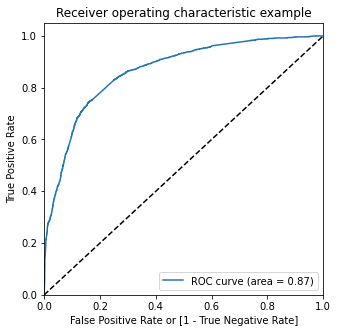

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

__The area under ROC curve is 0.87, which is a very good value__

### Finding the Optimal cut-off point

In [120]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.478803,3812,0,1,1,1,1,1,0,0,0,0,0
1,1,0.778036,1189,1,1,1,1,1,1,1,1,1,0,0
2,1,0.958987,784,1,1,1,1,1,1,1,1,1,1,1
3,0,0.229744,2996,0,1,1,1,0,0,0,0,0,0,0
4,1,0.955312,1408,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.371935     1.000000     0.000000
0.1   0.1  0.527589     0.982601     0.258134
0.2   0.2  0.717984     0.897894     0.611443
0.3   0.3  0.775715     0.837454     0.739154
0.4   0.4  0.806710     0.715659     0.860629
0.5   0.5  0.804837     0.663004     0.888829
0.6   0.6  0.782357     0.549451     0.920282
0.7   0.7  0.758685     0.448718     0.942245
0.8   0.8  0.737398     0.347527     0.968275
0.9   0.9  0.710661     0.238553     0.990239


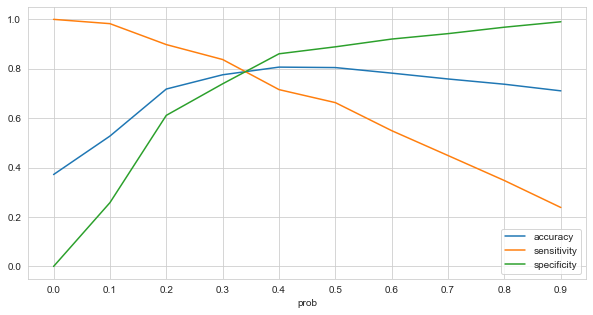

In [122]:
# plotting accuracy, sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'], figsize=[10,5])
plt.xticks(np.arange(0, 1, step=0.1), size=10)
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [123]:
#creating the final_predicted values at 0.28 cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.478803,3812,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.778036,1189,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.958987,784,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.229744,2996,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.955312,1408,1,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# creating the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.478803,3812,0,1,1,1,1,1,0,0,0,0,0,1,48
1,1,0.778036,1189,1,1,1,1,1,1,1,1,1,0,0,1,78
2,1,0.958987,784,1,1,1,1,1,1,1,1,1,1,1,1,96
3,0,0.229744,2996,0,1,1,1,0,0,0,0,0,0,0,0,23
4,1,0.955312,1408,1,1,1,1,1,1,1,1,1,1,1,1,96
5,0,0.230480,7637,0,1,1,1,0,0,0,0,0,0,0,0,23
6,0,0.042853,390,0,1,0,0,0,0,0,0,0,0,0,0,4
7,1,0.965557,2650,1,1,1,1,1,1,1,1,1,1,1,1,97
8,1,0.171402,3765,0,1,1,0,0,0,0,0,0,0,0,0,17
9,0,0.123663,6397,0,1,1,0,0,0,0,0,0,0,0,0,12


### Calculating the conversion rate on final_predicted values

In [125]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

1    1854
0     330
Name: final_predicted, dtype: int64

In [126]:
# check the precentage of final_predicted conversions

1891/float(1891+348)

0.8445734702992407

##### Hence we can see that the final prediction of conversions is at 84.45% which is greater than 80% target as per the X Educations CEO's requirement . Hence this is a very good model.

In [127]:
# calculating overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7695844686648501

In [128]:
#creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2665, 1023],
       [ 330, 1854]], dtype=int64)

In [129]:
TP_2 = confusion2[1,1] # true positive 
TN_2 = confusion2[0,0] # true negatives
FP_2 = confusion2[0,1] # false positives
FN_2 = confusion2[1,0] # false negatives

In [130]:
# sensitivity of the regression model
TP_2 / float(TP_2+FN_2)

0.8489010989010989

In [131]:
# specificity of the regression model
TN_2 / float(TN_2+FP_2)

0.7226138828633406

___With the current cut off at 0.28 we have <br>
accuracy = 76.9% <br>
sensitivity = 84.8% <br>
specificity = 72.2%.___

## Other Metrics

### Precision & Recall

In [132]:
# Precision = TP / TP + FP
TP_2/(TP_2+FP_2)

0.6444212721584984

In [133]:
#Recall = TP / TP + FN
TP_2/(TP_2+FN_2)

0.8489010989010989

__With the current cut off at 0.28 we have <br>
Precision = 64.4% <br>
Recall =84.8%__

#### Precision - Recall trade off

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

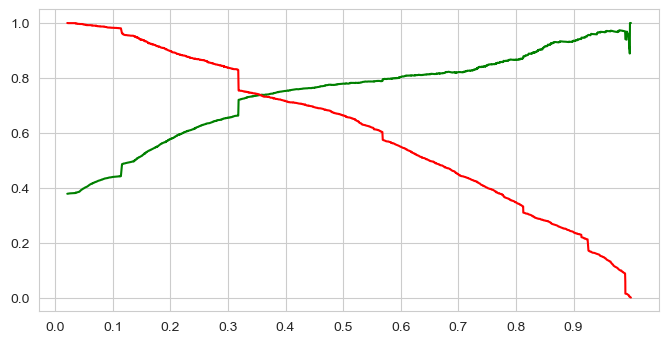

In [135]:
plt.figure(figsize=(8, 4), dpi=100, frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.1))
plt.show()

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.478803,3812,0,1,1,1,1,1,0,0,0,0,0,1,48
1,1,0.778036,1189,1,1,1,1,1,1,1,1,1,0,0,1,78
2,1,0.958987,784,1,1,1,1,1,1,1,1,1,1,1,1,96
3,0,0.229744,2996,0,1,1,1,0,0,0,0,0,0,0,0,23
4,1,0.955312,1408,1,1,1,1,1,1,1,1,1,1,1,1,96


In [137]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8051771117166212

In [138]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3108,  580],
       [ 564, 1620]], dtype=int64)

In [139]:
# true positive
TP_3 = confusion3[1,1]
# true negatives
TN_3 = confusion3[0,0]
# false positives
FP_3 = confusion3[0,1] 
# false negatives
FN_3 = confusion3[1,0]

In [140]:
# Precision = TP / TP + FP
TP_3 / (TP_3 + FP_3)

0.7363636363636363

In [141]:
#Recall = TP / TP + FN
TP_3 / (TP_3 + FN_3)

0.7417582417582418

__With the current cut off at 0.35 we have <br>
Precision = 73.6% <br>
Recall =74.1%__

# Step 7: Predictions on test set

### Rescaling numerical features

In [142]:
#creating list of numerical variables for rescaling
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Applying the scaling to the numerical variables 
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_UnKnown,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UnKnown
7651,0,0,-0.311863,1.096892,-0.646452,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7203,0,0,0.154581,-0.338338,0.503587,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7260,0,0,0.621024,-0.520502,-0.071433,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5875,0,0,-1.244749,-0.866429,-1.221472,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4241,0,0,-1.244749,-0.866429,-1.221472,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
#selecting features from the model
X_test = X_test[col]

#adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Country_UnKnown,Specialization_UnKnown,What is your current occupation_UnKnown,What is your current occupation_Working Professional
7651,1.0,0,1.096892,0,0,0,0,0,1,0
7203,1.0,0,-0.338338,1,0,0,0,0,0,0
7260,1.0,0,-0.520502,1,0,0,0,0,0,0
5875,1.0,0,-0.866429,0,0,0,1,1,1,0
4241,1.0,0,-0.866429,0,1,0,1,0,0,0


### making predictions on test set

In [144]:
# creating predictions in 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.490757
1,0,0.222467
2,0,0.188896
3,0,0.114209
4,1,0.924464


In [145]:
# Making predictions using cut off 0.28
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.490757,1
1,0,0.222467,0
2,0,0.188896,0
3,0,0.114209,0
4,1,0.924464,1


In [146]:
# creating the lead score

y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted,lead_score
0,0,0.490757,1,49
1,0,0.222467,0,22
2,0,0.188896,0,19
3,0,0.114209,0,11
4,1,0.924464,1,92
5,0,0.213627,0,21
6,0,0.534876,1,53
7,0,0.240588,0,24
8,1,0.976672,1,98
9,0,0.397980,1,40


#### Conversion Rate of final_predicted on test set

In [147]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

check_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts()

1    768
0    174
Name: final_predicted, dtype: int64

In [148]:
# check the precentage of final_predicted conversions on test data

813/float(813+130)

0.8621420996818664

##### Hence we can see that the final prediction of conversion reate is at 86% which is greater than the target 80%.

In [149]:
# overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7556615017878426

In [150]:
# confusion matrix 
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1134,  441],
       [ 174,  768]], dtype=int64)

In [151]:
TP_4 = confusion4[1,1] # true positive 
TN_4 = confusion4[0,0] # true negatives
FP_4 = confusion4[0,1] # false positives
FN_4 = confusion4[1,0] # false negatives

In [152]:
# Calculating the sensitivity
TP_4/(TP_4+FN_4)

0.8152866242038217

In [153]:
# Calculating the specificity
TN_4/(TN_4+FP_4)

0.72

___With the current cut off at 0.28 we have <br>
accuracy = 75.5% <br>
sensitivity = 81.5% <br>
specificity = 72.5%___

## Other Metrics

### Precision & Recall

In [154]:
# Precision = TP / TP + FP
TP_4/(TP_4+FP_4)

0.6352357320099256

In [155]:
#Recall = TP / TP + FN
TP_4/(TP_4+FN_4)

0.8152866242038217

___With the current cut off at 0.28 we have <br>
Precision = 63.5% <br>
Recall = 81.5%___

# Conclusion

__The following are the conclusions made out of this model__

* The Sensitivity, Specificity scores on test set are very good, and are closer to the train set scores at optimal cut-off point.
* Hence the model is a very good model and in business terms, this model has an ability to adjust with the company’s requirements in coming future.
* The conversion rate on the final predicted model is greater than 80% on both train and test sets, which is the target given by the CEO of the company.
* The top most 3 important features in the final model are,
    1. Lead Source_Welingak Website
    2. Lead Origin_Lead Add Form
    3. What is your current occupation_Working Professional

